In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

#import ds_utilidades as ds

pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('seaborn-notebook')

## Data loading and cleaning

In this section, the applicant loads and cleans raw data from the following files:
- `precipitaciones.csv` has the monthly mean of rainfall registered from January 1979 to April 2020.
- `banco_central.csv` has macroeconomic variables.

### Rainfall _(precipitaciones)_

In [2]:
precipitaciones = pd.read_csv('../data/precipitaciones.csv')#[mm]
precipitaciones['date'] = pd.to_datetime(precipitaciones['date'], format = '%Y-%m-%d')
precipitaciones = precipitaciones.sort_values(by = 'date', ascending = True).reset_index(drop = True)
precipitaciones

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
2,1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
3,1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
4,1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116
...,...,...,...,...,...,...,...,...,...
491,2019-12-01,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090
492,2020-01-01,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625
493,2020-02-01,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889
494,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866


In [3]:
precipitaciones[precipitaciones.isna().any(axis=1)] #no tiene nans

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios


In [4]:
precipitaciones[precipitaciones.duplicated(subset = 'date', keep = False)] #ni repetidos

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios


In [5]:
regiones = ['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios']
precipitaciones[regiones].describe() 

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [6]:
precipitaciones.dtypes

date                                   datetime64[ns]
Coquimbo                                      float64
Valparaiso                                    float64
Metropolitana_de_Santiago                     float64
Libertador_Gral__Bernardo_O_Higgins           float64
Maule                                         float64
Biobio                                        float64
La_Araucania                                  float64
Los_Rios                                      float64
dtype: object

### Macroeconomic variables _(banco central)_

In [7]:
banco_central = pd.read_csv('../data/banco_central.csv')
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01 00:00:00 UTC,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01 00:00:00 UTC,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01 00:00:00 UTC,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01 00:00:00 UTC,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


In [8]:
banco_central['Periodo'] = banco_central['Periodo'].apply(lambda x: x[0:10])

banco_central['Periodo'] = pd.to_datetime(banco_central['Periodo'], format = '%Y-%m-%d', errors = 'coerce')
display(banco_central.head())
print(banco_central.columns) 


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


Index(['Periodo', 'Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'Impuesto_al_valor

In [9]:
banco_central[banco_central.duplicated(subset = 'Periodo', keep = False)] #repetido se elimina

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
65,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,...,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
66,2018-08-01,109.690.834,994.693.267,101.027.633,1.051.861,931.900.957,106.248.833,117.404.143,109.458.386,110.578.221,...,911.086.301,102.691.109,983.228.221,108.792.744,105.596.535,654.060.172,113.525.936,103.995.337,15.375.472,38729.0
78,2019-08-01,113.886.371,103.237.519,106.828.407,105.153.122,984.395.274,106.901.816,122.596.004,113.695.907,114.580.893,...,948.715.254,104.034.103,102.619.922,107.666.732,104.591.452,6598,116.203.109,107.385.297,15.342.321,33059.0
79,2019-08-01,113.886.371,103.237.519,106.828.407,105.153.122,984.395.274,106.901.816,122.596.004,113.695.907,114.580.893,...,948.715.254,104.034.103,102.619.922,107.666.732,104.591.452,6598,116.203.109,107.385.297,15.342.321,33059.0


In [10]:
banco_central.shape

(614, 85)

In [11]:
banco_central.drop_duplicates(subset = 'Periodo', inplace = True)
banco_central = banco_central[~banco_central.Periodo.isna()]

In [12]:
banco_central.shape

(611, 85)

In [13]:
def convert_int(x):
    return int(x.replace('.', ''))

cols_pib = [x for x in list(banco_central.columns) if 'PIB' in x]
cols_pib.extend(['Periodo'])
banco_central_pib = banco_central[cols_pib]
banco_central_pib = banco_central_pib.dropna(how = 'any', axis = 0)

for col in cols_pib:
    if col == 'Periodo':
        continue
    else:
        banco_central_pib[col] = banco_central_pib[col].apply(lambda x: convert_int(x))

banco_central_pib.sort_values(by = 'Periodo', ascending = True)
banco_central_pib

,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,...,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB,Periodo
0,579846819,570624122,123491343,110356254,131350889,130648285,367818436,162692807,330305467,643366109,...,546694889,337915263,5691837,11393886,793471519,140103913,512994015,108482797,118109613,2013-03-01
1,374895706,606504665,11702736,10358806,134393001,133442735,38211344,188189562,380345362,684106836,...,544306818,348801015,565071466,121229491,80455108,144685333,511803995,107193235,116809697,2013-04-01
2,311356127,545573168,121317874,107784409,135334655,134668498,37345015,184115565,342850811,686925227,...,536681481,355711814,571394036,125792137,805307434,147859706,512469359,107210039,116784548,2013-05-01
3,246592082,418668119,129227656,115404932,138227237,127613384,323857815,17224193,290637238,667221833,...,526589163,353452988,573271479,125565876,811366828,146903407,514736611,105389875,114702694,2013-06-01
4,201156433,565897618,123677441,10915864,145188012,128840589,327206582,163572934,277405414,692167097,...,536446432,353028667,574971364,124038548,813086052,108506835,515375539,101167369,11084055,2013-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,188331918,707214659,1324928,119520525,130720477,123810329,369570934,13719304,164021248,67608185,...,441549174,42522432,715080906,113112652,911758222,116566888,615639916,101614557,111070003,2020-07-01
92,15867781,614712298,130864273,117055913,138696143,125163085,348252328,145265267,181336575,695058355,...,471891836,407014189,711575686,110732905,919298916,140456962,617357193,105754404,116407225,2020-08-01
93,169746171,468872234,126941868,114236494,127906055,12788268,334311036,154593729,206059133,707756582,...,509565911,439254033,720980294,127546136,948454602,131205334,619801512,107849829,118574799,2020-09-01
143,555875498,454921898,120112803,106165654,139471494,127226524,331215957,171180702,310805622,62929711,...,53672742,36993507,571866642,123185498,821085632,762087515,506965418,100532954,109771386,2013-01-01


In [14]:
def to_100(x): #mirando datos del bc, pib existe entre ~85-120 - igual esto es cm (?)
    x = x.split('.')
    if x[0].startswith('1'): #es 100+
        if len(x[0]) >2:
            return float(x[0] + '.' + x[1])
        else:
            x = x[0]+x[1]
            return float(x[0:3] + '.' + x[3:])
    else:
        if len(x[0])>2:
            return float(x[0][0:2] + '.' + x[0][-1])
        else:
            x = x[0] + x[1]
            return float(x[0:2] + '.' + x[2:])

        
cols_imacec = [x for x in list(banco_central.columns) if 'Imacec' in x]
cols_imacec.extend(['Periodo'])
banco_central_imacec = banco_central[cols_imacec]
banco_central_imacec = banco_central_imacec.dropna(how = 'any', axis = 0)

for col in cols_imacec:
    if col == 'Periodo':
        continue
    else:
        banco_central_imacec[col] = banco_central_imacec[col].apply(lambda x: to_100(x))
        assert(banco_central_imacec[col].max()>100)
        assert(banco_central_imacec[col].min()>30)

banco_central_imacec.sort_values(by = 'Periodo', ascending = True)
banco_central_imacec

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,Periodo
0,102.796,105.46,97.800,102.297,114.994,110.729,100.064,103.163,103.405,2013-03-01
1,101.664,99.90,92.700,104.485,102.199,106.098,102.600,101.937,102.766,2013-04-01
2,101.642,99.30,96.133,105.445,96.800,100.462,104.083,101.953,102.322,2013-05-01
3,99.800,96.80,102.400,99.900,89.190,93.900,103.857,100.222,99.500,2013-06-01
4,96.400,96.10,98.000,100.882,90.100,92.776,96.900,96.200,96.200,2013-07-01
...,...,...,...,...,...,...,...,...,...,...
609,79.200,80.90,84.400,86.200,72.100,64.000,82.900,79.900,78.600,2008-08-01
610,78.600,81.40,87.500,85.990,69.300,62.900,81.000,79.100,77.200,2008-09-01
611,84.100,89.60,98.000,88.900,79.386,65.300,85.600,85.038,81.800,2008-10-01
612,82.846,84.50,86.400,83.063,84.300,63.800,88.100,83.800,82.500,2008-11-01


In [15]:
banco_central_imacec.columns

Index(['Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Periodo'],
      dtype='object')

In [16]:
banco_central_iv = banco_central[['Indice_de_ventas_comercio_real_no_durables_IVCM', 'Periodo']]
banco_central_iv = banco_central_iv.dropna() # -unidades? #parte 
banco_central_iv = banco_central_iv.sort_values(by = 'Periodo', ascending = True)

In [17]:
banco_central_iv.head() #unidades? https://si3.bcentral.cl/siete/ES/Siete/Canasta?idCanasta=M57TP1161519 porcentajes?

,Indice_de_ventas_comercio_real_no_durables_IVCM,Periodo
10,943.909.236,2014-01-01
11,928.126.259,2014-02-01
12,101.583.412,2014-03-01
13,963.546.529,2014-04-01
14,998.625.376,2014-05-01


In [18]:
banco_central_iv['num'] = banco_central_iv.Indice_de_ventas_comercio_real_no_durables_IVCM.apply(lambda x: to_100(x))
banco_central_iv

,Indice_de_ventas_comercio_real_no_durables_IVCM,Periodo,num
10,943.909.236,2014-01-01,94.300
11,928.126.259,2014-02-01,92.800
12,101.583.412,2014-03-01,101.583
13,963.546.529,2014-04-01,96.300
14,998.625.376,2014-05-01,99.800
...,...,...,...
90,824.851.611,2020-06-01,82.400
91,878.226.907,2020-07-01,87.800
92,107.356.493,2020-08-01,107.356
93,107.622.401,2020-09-01,107.622


In [19]:
banco_central_iv.Periodo.min()

Timestamp('2014-01-01 00:00:00')

In [20]:
banco_central_iv.Periodo.max()

Timestamp('2020-10-01 00:00:00')

In [21]:
banco_central_iv.shape

(82, 3)

In [22]:
banco_central_num = pd.merge(banco_central_pib, banco_central_imacec, on = 'Periodo', how = 'inner')
banco_central_num = pd.merge(banco_central_num, banco_central_iv, on = 'Periodo', how = 'inner')

# Supply data and feature engineering.

In this section, the applicant loads the file `precio_leche.csv` which contains the monthly price of milk from 1979 to 2021. She/he/they merges this dataset with the data previously processed and creates new variables to help prediction (feature engineering). Aditionally, some some variables are plotted for exploratory analisys.

In [23]:
precio_leche = pd.read_csv('../data/precio_leche.csv')
precio_leche.rename(columns = {'Anio': 'ano', 'Mes': 'mes_pal'}, inplace = True) # precio = nominal, sin iva en clp/litro
precio_leche['mes'] = pd.to_datetime(precio_leche['mes_pal'], format = '%b')
precio_leche['mes'] = precio_leche['mes'].apply(lambda x: x.month)
precio_leche['mes-ano'] = precio_leche.apply(lambda x: f'{x.mes}-{x.ano}', axis = 1)
precio_leche.head()

,ano,mes_pal,Precio_leche,mes,mes-ano
0,1979,Ene,3.85,1,1-1979
1,1979,Feb,4.58,2,2-1979
2,1979,Mar,5.18,3,3-1979
3,1979,Abr,6.06,4,4-1979
4,1979,May,7.25,5,5-1979


<AxesSubplot:xlabel='mes-ano'>

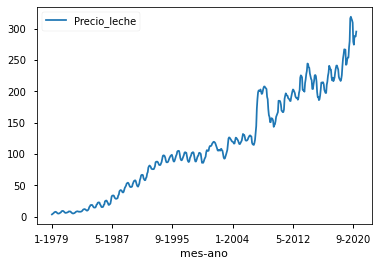

In [24]:
precio_leche.plot(x = 'mes-ano', y = 'Precio_leche') #alza 2010-2011?

<AxesSubplot:xlabel='mes-ano'>

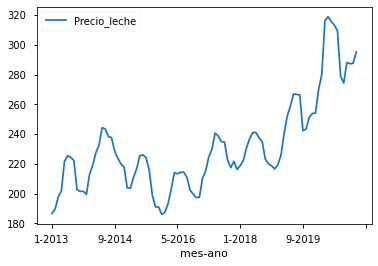

In [25]:
precio_leche[precio_leche.ano>=2013].plot(x = 'mes-ano', y = 'Precio_leche')

In [26]:
precipitaciones['mes'] = precipitaciones.date.apply(lambda x: x.month)
precipitaciones['ano'] = precipitaciones.date.apply(lambda x: x.year)
precio_leche_pp = pd.merge(precio_leche, precipitaciones, on = ['mes', 'ano'], how = 'inner')
precio_leche_pp.drop('date', axis = 1, inplace = True)
precio_leche_pp #precipitaciones fecha_max = 2020-04-01

,ano,mes_pal,Precio_leche,mes,mes-ano,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1979,Ene,3.85,1,1-1979,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
1,1979,Feb,4.58,2,2-1979,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
2,1979,Mar,5.18,3,3-1979,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
3,1979,Abr,6.06,4,4-1979,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
4,1979,May,7.25,5,5-1979,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019,Dic,253.86,12,12-2019,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090
492,2020,Ene,254.10,1,1-2020,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625
493,2020,Feb,270.15,2,2-2020,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889
494,2020,Mar,279.88,3,3-2020,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866


In [27]:
banco_central_num['Periodo'].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Periodo, dtype: datetime64[ns]

In [28]:
banco_central_num['Periodo'] = pd.to_datetime(banco_central_num['Periodo'])

In [29]:
banco_central_num['Periodo'].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Periodo, dtype: datetime64[ns]

In [30]:
banco_central_num['mes'] = banco_central_num['Periodo'].apply(lambda x: x.month)
banco_central_num['ano'] = banco_central_num['Periodo'].apply(lambda x: x.year)
precio_leche_pp_pib = pd.merge(precio_leche_pp, banco_central_num, on = ['mes', 'ano'], how = 'inner')
precio_leche_pp_pib.drop(['Periodo', 'Indice_de_ventas_comercio_real_no_durables_IVCM', 'mes-ano', 'mes_pal'], axis =1, inplace = True)
precio_leche_pp_pib

,ano,Precio_leche,mes,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,...,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,num
0,2014,213.02,1,3.524673,2.378766,7.278272,4.804760,7.831522,33.684003,96.707966,...,97.600,101.540,97.700,98.500,107.470,103.244,93.851,97.687,97.500,94.300
1,2014,219.03,2,1.688856,8.389854,17.803070,7.295178,3.015932,22.186197,43.157411,...,93.500,98.200,94.200,91.800,107.454,102.175,88.800,93.710,93.400,92.800
2,2014,227.45,3,2.237203,5.082094,5.403087,15.025209,31.280017,78.854388,128.113100,...,105.885,107.308,101.285,105.167,114.516,117.370,103.080,106.096,106.453,101.583
3,2014,232.47,4,0.954797,2.044854,11.612500,17.549566,49.346997,91.352068,108.177327,...,103.133,100.710,97.400,103.903,100.708,106.543,105.138,103.606,103.829,96.300
4,2014,244.29,5,2.484941,22.233003,59.984144,134.375287,174.540865,196.509109,250.971478,...,103.643,101.511,106.591,103.056,95.600,103.126,105.888,103.961,103.279,99.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2019,253.86,12,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,...,122.347,123.733,113.048,112.460,141.504,136.104,115.830,120.908,123.293,139.938
72,2020,254.10,1,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,...,110.288,110.053,97.100,107.389,122.090,121.522,108.043,110.123,111.698,106.139
73,2020,270.15,2,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,...,106.982,109.066,97.000,101.005,124.713,119.993,102.962,106.934,108.021,107.607
74,2020,279.88,3,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,...,114.025,114.239,102.936,106.375,129.143,121.312,113.370,114.477,115.187,102.108


# Model
In this section, the applicant builds a regression model to predict the price of milk. The model uses and macroeconomic climatological variables loaded at the beginning of this notebook. It also uses features created in the previous section.

In [31]:
X = precio_leche_pp_pib.drop(['Precio_leche'], axis = 1)
y = precio_leche_pp_pib['Precio_leche']

In [32]:
X.shape

(76, 48)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ano                                           76 non-null     int64  
 1   mes                                           76 non-null     int64  
 2   Coquimbo                                      76 non-null     float64
 3   Valparaiso                                    76 non-null     float64
 4   Metropolitana_de_Santiago                     76 non-null     float64
 5   Libertador_Gral__Bernardo_O_Higgins           76 non-null     float64
 6   Maule                                         76 non-null     float64
 7   Biobio                                        76 non-null     float64
 8   La_Araucania                                  76 non-null     float64
 9   Los_Rios                                      76 non-null     float

In [34]:
y.mean()

226.87723684210528

In [35]:
y.std()

22.840491214722693

In [36]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# generate random data-set
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([('scale', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_regression)),
                 ('poly', PolynomialFeatures()),
                 ('model', Ridge())])
k=[3, 4, 5, 6, 7, 10]
alpha=[1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
poly = [1, 2, 3, 5, 7]
grid = GridSearchCV(estimator = pipe,
                    param_grid = dict(selector__k=k,
                                      poly__degree=poly,
                                      model__alpha=alpha),
                    cv = 3,
                   scoring = 'r2')
grid.fit(X_train, y_train)
y_predicted = grid.predict(X_test)

# evaluar modelo
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  115.50948966963992
R2:  0.7402504436757734


In [37]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('selector',
                 SelectKBest(score_func=<function mutual_info_regression at 0x7f0700130820>)),
                ('poly', PolynomialFeatures()), ('model', Ridge())])

In [38]:
grid.best_params_

{'model__alpha': 1, 'poly__degree': 2, 'selector__k': 3}

In [39]:
X_train.columns[grid.best_estimator_.named_steps['selector'].get_support()]

Index(['ano', 'Biobio', 'PIB_Transporte'], dtype='object')

In [40]:
X_train.columns

Index(['ano', 'mes', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'PIB', 'Imacec_empalmado',
       'Imacec_produccion_de_bienes', 'Imacec_minero', 'I

In [55]:
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

In [57]:
X_train.head(1).to_dict()

{'ano': {9: 2014},
 'mes': {9: 10},
 'Coquimbo': {9: 2.86377778378334},
 'Valparaiso': {9: 3.27868506738118},
 'Metropolitana_de_Santiago': {9: 9.39196308573158},
 'Libertador_Gral__Bernardo_O_Higgins': {9: 10.7474883784619},
 'Maule': {9: 15.2082362773266},
 'Biobio': {9: 44.7946874886117},
 'La_Araucania': {9: 93.7344629690108},
 'Los_Rios': {9: 164.0555040325},
 'PIB_Agropecuario_silvicola': {9: 246063402},
 'PIB_Pesca': {9: 658990364},
 'PIB_Mineria': {9: 136630734},
 'PIB_Mineria_del_cobre': {9: 120179215},
 'PIB_Otras_actividades_mineras': {9: 164515187},
 'PIB_Industria_Manufacturera': {9: 132143102},
 'PIB_Alimentos': {9: 340178603},
 'PIB_Bebidas_y_tabaco': {9: 166094283},
 'PIB_Textil': {9: 322548927},
 'PIB_Maderas_y_muebles': {9: 765629098},
 'PIB_Celulosa': {9: 102931541},
 'PIB_Refinacion_de_petroleo': {9: 931990492},
 'PIB_Quimica': {9: 216543583},
 'PIB_Minerales_no_metalicos_y_metalica_basica': {9: 749235327},
 'PIB_Productos_metalicos': {9: 218742629},
 'PIB_Electrici

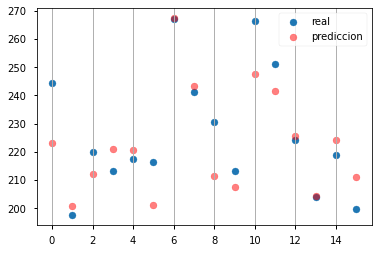

In [41]:
predicted = pd.DataFrame(y_test).reset_index(drop = True)
predicted['predicc'] = y_predicted
predicted= predicted.reset_index()
plt.scatter(predicted.index, predicted['Precio_leche'], label = 'real')
plt.scatter(predicted.index, predicted['predicc'], color = 'red', label = 'prediccion', alpha = 0.5)
plt.grid(axis = 'x')
plt.legend()

Text(0, 0.5, 'Residuo (y_real - y_pred)')

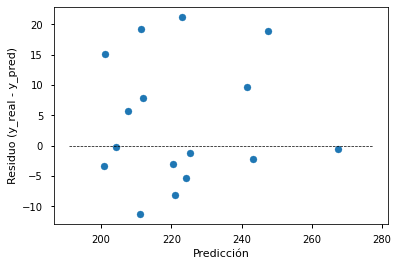

In [42]:
predicted['residual'] = predicted.Precio_leche - predicted.predicc
plt.hlines(0, xmin = predicted.predicc.min()-10, xmax = predicted.predicc.max()+10, linestyle='--', color = 'black', linewidth = 0.7)
plt.scatter(predicted.predicc, predicted.residual)
plt.xlabel('Predicción')
plt.ylabel('Residuo (y_real - y_pred)')

### Regresión utilizando solamente variables macroeconómicas y climatológicas

In [43]:
# generate random data-set
np.random.seed(0)
cols_no_leche = [x for x in list(X.columns) if not ('leche' in x)]
X_train = X_train[cols_no_leche]
X_test = X_test[cols_no_leche]

pipe = Pipeline([('scale', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_regression)),
                 ('poly', PolynomialFeatures()),
                 ('model', Ridge())])
k=[3, 4, 5, 6, 7, 10]
alpha=[1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
poly = [1, 2, 3, 5, 7]
grid = GridSearchCV(estimator = pipe,
                    param_grid = dict(selector__k=k,
                                      poly__degree=poly,
                                      model__alpha=alpha),
                    cv = 3,
                   scoring = 'r2')
grid.fit(X_train, y_train)
y_predicted_noleche = grid.predict(X_test)

# evaluar modelo
rmse = mean_squared_error(y_test, y_predicted_noleche)
r2 = r2_score(y_test, y_predicted_noleche)

# printing values
print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  115.50948966963992
R2:  0.7402504436757734


In [44]:
grid.best_params_

{'model__alpha': 1, 'poly__degree': 2, 'selector__k': 3}

In [45]:
X_train.columns[grid.best_estimator_.named_steps['selector'].get_support()]

Index(['ano', 'Biobio', 'PIB_Transporte'], dtype='object')

In [46]:
display(X_train.columns)
display(len(X_train.columns))

Index(['ano', 'mes', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios', 'PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'PIB', 'Imacec_empalmado',
       'Imacec_produccion_de_bienes', 'Imacec_minero', 'I

48

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 9 to 51
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ano                                           60 non-null     int64  
 1   mes                                           60 non-null     int64  
 2   Coquimbo                                      60 non-null     float64
 3   Valparaiso                                    60 non-null     float64
 4   Metropolitana_de_Santiago                     60 non-null     float64
 5   Libertador_Gral__Bernardo_O_Higgins           60 non-null     float64
 6   Maule                                         60 non-null     float64
 7   Biobio                                        60 non-null     float64
 8   La_Araucania                                  60 non-null     float64
 9   Los_Rios                                      60 non-null     float

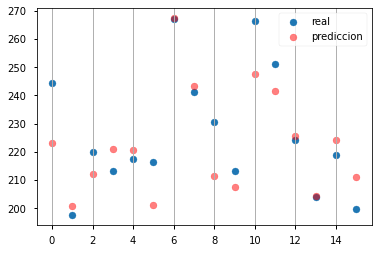

In [48]:
predicted = pd.DataFrame(y_test).reset_index(drop = True)
predicted['predicc'] =y_predicted_noleche
predicted= predicted.reset_index()
plt.scatter(predicted.index, predicted['Precio_leche'], label = 'real')
plt.scatter(predicted.index, predicted['predicc'], color = 'red', label = 'prediccion', alpha = 0.5)
plt.grid(axis = 'x')
plt.legend()

Text(0, 0.5, 'Residuo (y_real - y_pred)')

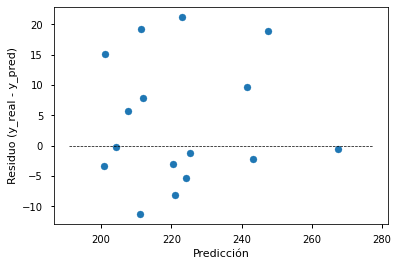

In [49]:
predicted['residual'] = predicted.Precio_leche - predicted.predicc
plt.hlines(0, xmin = predicted.predicc.min()-10, xmax = predicted.predicc.max()+10, linestyle='--', color = 'black', linewidth = 0.7)
plt.scatter(predicted.predicc, predicted.residual)
plt.xlabel('Predicción')
plt.ylabel('Residuo (y_real - y_pred)')

In [59]:
1

1